In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_1975 = pd.read_excel(r'C:\Users\qays\Documents\Code\Python\Datacamp\darwin finches\Finches.xlsx','Finch Beaks 1975')
df_2012 = pd.read_excel(r'C:\Users\qays\Documents\Code\Python\Datacamp\darwin finches\Finches.xlsx','Finch Beaks 2012')

In [3]:
df_1975

,"band,species,""Beak length, mm"",""Beak depth, mm"""
0,"2,fortis,9.4,8"
1,"9,fortis,9.2,8.3"
2,"12,fortis,9.5,7.5"
3,"15,fortis,9.5,8"
4,"305,fortis,11.5,9.9"
...,...
398,"20225,scandens,14.55,9.45"
399,"20252,scandens,14.05,9.05"
400,"20255,scandens,14.45,8.75"
401,"20266,scandens,15.05,9.45"


In [4]:
df_2012

,"band,species,blength,bdepth"
0,"19022,fortis,10,8.5"
1,"19028,fortis,12.5,8.9"
2,"19032,fortis,9.3,7.5"
3,"19041,fortis,10.3,9.6"
4,"19044,fortis,11,9.2"
...,...
243,"21295,scandens,14.2,9.3"
244,"21297,scandens,13,9.8"
245,"21340,scandens,14.6,8.9"
246,"21342,scandens,13.1,9.8"


In [5]:
df_1975[['band','species','beak_length','beak_depth']] = df_1975['band,species,"Beak length, mm","Beak depth, mm"'].str.split(',',expand=True)
df_2012[['band','species','beak_length','beak_depth']] = df_2012['band,species,blength,bdepth'].str.split(',',expand=True)

In [6]:
df_1975 = df_1975.iloc[:,1:]
df_2012 = df_2012.iloc[:,1:]

In [7]:
df_1975['year']=1975
df_2012['year']=2012

In [10]:
df_whole = df_1975.append(df_2012)
df_whole = df_whole.reset_index()
df_whole = df_whole.iloc[:,1:]

In [11]:
df_whole

,band,species,beak_length,beak_depth,year
0,2,fortis,9.4,8,1975
1,9,fortis,9.2,8.3,1975
2,12,fortis,9.5,7.5,1975
3,15,fortis,9.5,8,1975
4,305,fortis,11.5,9.9,1975
...,...,...,...,...,...
646,21295,scandens,14.2,9.3,2012
647,21297,scandens,13,9.8,2012
648,21340,scandens,14.6,8.9,2012
649,21342,scandens,13.1,9.8,2012


In [12]:
df = df_whole[df_whole.species == 'scandens']

In [13]:
df.loc[:,'beak_depth'] = pd.to_numeric(df.loc[:,'beak_depth'])
df.loc[:,'beak_length'] = pd.to_numeric(df.loc[:,'beak_length'])

C:\Users\qays\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [14]:
df

,band,species,beak_length,beak_depth,year
316,302,scandens,13.9,8.4,1975
317,304,scandens,14.0,8.8,1975
318,306,scandens,12.9,8.4,1975
319,310,scandens,13.5,8.0,1975
320,317,scandens,12.9,7.9,1975
...,...,...,...,...,...
646,21295,scandens,14.2,9.3,2012
647,21297,scandens,13.0,9.8,2012
648,21340,scandens,14.6,8.9,2012
649,21342,scandens,13.1,9.8,2012


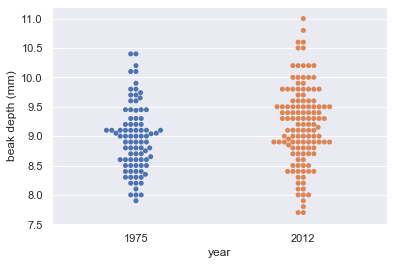

In [25]:
# Create bee swarm plot
sns.set()
_ = sns.swarmplot('year','beak_depth',data=df)

# Label the axes
_ = plt.xlabel('year')
_ = plt.ylabel('beak depth (mm)')

# Show the plot
plt.show()

In [16]:
bd_1975 = np.array(df[df.year == 1975]['beak_depth'])
bd_2012 = np.array(df[df.year == 2012]['beak_depth'])

In [17]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

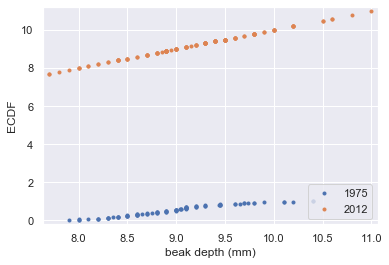

In [26]:
# Compute ECDFs
x_1975, y_1975 = ecdf(bd_1975)
x_2012, y_2012 = ecdf(bd_2012)

# Plot the ECDFs
_ = plt.plot(x_1975, y_1975, marker='.', linestyle='none')
_ = plt.plot(x_2012, x_2012, marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Add axis labels and legend
_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')

# Show the plot
plt.show()

In [19]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [20]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates


In [21]:
# Compute the difference of the sample means: mean_diff
mean_diff = np.mean(bd_2012) - np.mean(bd_1975)

# Get bootstrap replicates of means
bs_replicates_1975 = draw_bs_reps(bd_1975,np.mean,size=10000)
bs_replicates_2012 = draw_bs_reps(bd_2012,np.mean,size=10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates,[2.5,97.5])

# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = 0.22622047244094645 mm
95% confidence interval = [0.06190381 0.38890884] mm


In [22]:
# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((bd_1975, bd_2012)))

# Shift the samples
bd_1975_shifted = bd_1975 - np.mean(bd_1975) + combined_mean
bd_2012_shifted = bd_2012 - np.mean(bd_2012) + combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_1975 = draw_bs_reps(bd_1975_shifted,np.mean,10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted,np.mean,10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute the p-value
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

# Print p-value
print('p =', p)

p = 0.0042


In [23]:
bl_1975 = np.array(df[df.year == 1975]['beak_length'])
bl_2012 = np.array(df[df.year == 2012]['beak_length'])

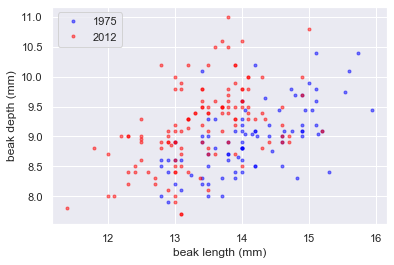

In [27]:
# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='None', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
            linestyle='None', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Show the plot
plt.show()

In [28]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(0,len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x,bs_y,1)

    return bs_slope_reps, bs_intercept_reps

In [29]:
# Compute the linear regressions
slope_1975, intercept_1975 = np.polyfit(bl_1975,bd_1975,1)
slope_2012, intercept_2012 = np.polyfit(bl_2012,bd_2012,1)

# Perform pairs bootstrap for the linear regressions
bs_slope_reps_1975, bs_intercept_reps_1975 = \
        draw_bs_pairs_linreg(bl_1975,bd_1975,size=1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = \
        draw_bs_pairs_linreg(bl_2012,bd_2012,size=1000)

# Compute confidence intervals of slopes
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975,[2.5,97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012,[2.5,97.5])
intercept_conf_int_1975 = np.percentile(bs_intercept_reps_1975,[2.5,97.5])

intercept_conf_int_2012 = np.percentile(bs_intercept_reps_2012,[2.5,97.5])


# Print the results
print('1975: slope =', slope_1975,
      'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975,
      'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012,
      'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012,
      'conf int =', intercept_conf_int_2012)

1975: slope = 0.4652051691605937 conf int = [0.33730523 0.58767219]
1975: intercept = 2.3908752365842276 conf int = [0.64484237 4.17322714]
2012: slope = 0.462630358835313 conf int = [0.33163918 0.59811459]
2012: intercept = 2.9772474982360198 conf int = [1.19389588 4.66770598]


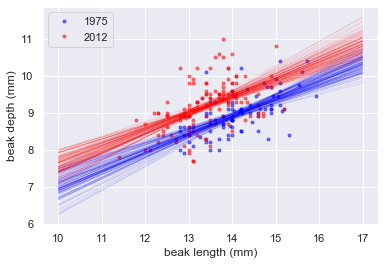

In [30]:
# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Generate x-values for bootstrap lines: x
x = np.array([10, 17])

# Plot the bootstrap lines
for i in range(100):
    plt.plot(x, bs_slope_reps_1975[i] * x + bs_intercept_reps_1975[i],
             linewidth=0.5, alpha=0.2, color='blue')
    plt.plot(x, bs_slope_reps_2012[i] * x + bs_intercept_reps_2012[i],
             linewidth=0.5, alpha=0.2, color='red')

# Draw the plot again
plt.show()

In [31]:
# Compute length-to-depth ratios
ratio_1975 = bl_1975/bd_1975
ratio_2012 = bl_2012/bd_2012

# Compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

# Generate bootstrap replicates of the means
bs_replicates_1975 = draw_bs_reps(ratio_1975,np.mean,10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012,np.mean,10000)

# Compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975,[0.5,99.5])
conf_int_2012 = np.percentile(bs_replicates_2012,[0.5,99.5])

# Print the results
print('1975: mean ratio =', mean_ratio_1975,
      'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
      'conf int =', conf_int_2012)

1975: mean ratio = 1.5788823771858533 conf int = [1.55655907 1.60132089]
2012: mean ratio = 1.4658342276847767 conf int = [1.44392306 1.48764336]
